# Exercise/Example: the biggest Earthquake in the UK this Century

## The Problem

`GeoJSON` is a json-based file format for sharing geographic data. One example dataset is the USGS earthquake data:

In [1]:
import requests

quakes = requests.get(
    "http://earthquake.usgs.gov/fdsnws/event/1/query.geojson",
    params={
        "starttime": "2000-01-01",
        "maxlatitude": "58.723",
        "minlatitude": "50.008",
        "maxlongitude": "1.67",
        "minlongitude": "-9.756",
        "minmagnitude": "1",
        "endtime": "2021-01-19",
        "orderby": "time-asc",
    },
)

In [2]:
# Look at the first 100 character
quakes.text[0:100]

'{"type":"FeatureCollection","metadata":{"generated":1642601649000,"url":"https://earthquake.usgs.gov'

In [3]:
# Look at all data:
quakes.text

'{"type":"FeatureCollection","metadata":{"generated":1642601649000,"url":"https://earthquake.usgs.gov/fdsnws/event/1/query.geojson?starttime=2000-01-01&maxlatitude=58.723&minlatitude=50.008&maxlongitude=1.67&minlongitude=-9.756&minmagnitude=1&endtime=2021-01-19&orderby=time-asc","title":"USGS Earthquakes","status":200,"api":"1.12.3","count":128},"features":[{"type":"Feature","properties":{"mag":2.6,"place":"12 km NNW of Penrith, United Kingdom","time":956553055700,"updated":1415322596133,"tz":null,"url":"https://earthquake.usgs.gov/earthquakes/eventpage/usp0009rst","detail":"https://earthquake.usgs.gov/fdsnws/event/1/query?eventid=usp0009rst&format=geojson","felt":null,"cdi":null,"mmi":null,"alert":null,"status":"reviewed","tsunami":0,"sig":104,"net":"us","code":"p0009rst","ids":",usp0009rst,","sources":",us,","types":",impact-text,origin,phase-data,","nst":null,"dmin":null,"rms":null,"gap":null,"magType":"ml","type":"earthquake","title":"M 2.6 - 12 km NNW of Penrith, United Kingdom"},

## Your exercise

Determine the **location** of the **largest magnitude** earthquake in the UK this century.

You can break this exercise down into several subtasks. You'll need to:
### Load the data
* Get the text of the web result
* Parse the data as JSON

### Investigate the data
* Understand how the data is structured into dictionaries and lists
   * Where is the magnitude?
   * Where is the place description or coordinates?
   
### Search through the data
* Program a search through all the quakes to find the biggest quake
* Find the place of the biggest quake

### Visualise your answer
* Form a URL for an online map service at that latitude and longitude: look back at the introductory example
* Display that image

Load the data:

In [13]:
import json

# !!! to convert dictionaries to json, use json.dumps(dict) !!!

# !!! to convert a text to json, use json.loads(text) !!!
quakes_json = json.loads(quakes.text)

quakes_json

{'type': 'Feature',
 'properties': {'mag': 2.6,
  'place': '12 km NNW of Penrith, United Kingdom',
  'time': 956553055700,
  'updated': 1415322596133,
  'tz': None,
  'url': 'https://earthquake.usgs.gov/earthquakes/eventpage/usp0009rst',
  'detail': 'https://earthquake.usgs.gov/fdsnws/event/1/query?eventid=usp0009rst&format=geojson',
  'felt': None,
  'cdi': None,
  'mmi': None,
  'alert': None,
  'status': 'reviewed',
  'tsunami': 0,
  'sig': 104,
  'net': 'us',
  'code': 'p0009rst',
  'ids': ',usp0009rst,',
  'sources': ',us,',
  'types': ',impact-text,origin,phase-data,',
  'nst': None,
  'dmin': None,
  'rms': None,
  'gap': None,
  'magType': 'ml',
  'type': 'earthquake',
  'title': 'M 2.6 - 12 km NNW of Penrith, United Kingdom'},
 'geometry': {'type': 'Point', 'coordinates': [-2.81, 54.77, 14]},
 'id': 'usp0009rst'}

Investigate the data:

In [16]:
quakes_json['features'][:5]

[{'type': 'Feature',
  'properties': {'mag': 2.6,
   'place': '12 km NNW of Penrith, United Kingdom',
   'time': 956553055700,
   'updated': 1415322596133,
   'tz': None,
   'url': 'https://earthquake.usgs.gov/earthquakes/eventpage/usp0009rst',
   'detail': 'https://earthquake.usgs.gov/fdsnws/event/1/query?eventid=usp0009rst&format=geojson',
   'felt': None,
   'cdi': None,
   'mmi': None,
   'alert': None,
   'status': 'reviewed',
   'tsunami': 0,
   'sig': 104,
   'net': 'us',
   'code': 'p0009rst',
   'ids': ',usp0009rst,',
   'sources': ',us,',
   'types': ',impact-text,origin,phase-data,',
   'nst': None,
   'dmin': None,
   'rms': None,
   'gap': None,
   'magType': 'ml',
   'type': 'earthquake',
   'title': 'M 2.6 - 12 km NNW of Penrith, United Kingdom'},
  'geometry': {'type': 'Point', 'coordinates': [-2.81, 54.77, 14]},
  'id': 'usp0009rst'},
 {'type': 'Feature',
  'properties': {'mag': 4,
   'place': '1 km WSW of Warwick, United Kingdom',
   'time': 969683025790,
   'updated'

In [20]:
quakes_json['features'][0]['properties']

{'mag': 2.6,
 'place': '12 km NNW of Penrith, United Kingdom',
 'time': 956553055700,
 'updated': 1415322596133,
 'tz': None,
 'url': 'https://earthquake.usgs.gov/earthquakes/eventpage/usp0009rst',
 'detail': 'https://earthquake.usgs.gov/fdsnws/event/1/query?eventid=usp0009rst&format=geojson',
 'felt': None,
 'cdi': None,
 'mmi': None,
 'alert': None,
 'status': 'reviewed',
 'tsunami': 0,
 'sig': 104,
 'net': 'us',
 'code': 'p0009rst',
 'ids': ',usp0009rst,',
 'sources': ',us,',
 'types': ',impact-text,origin,phase-data,',
 'nst': None,
 'dmin': None,
 'rms': None,
 'gap': None,
 'magType': 'ml',
 'type': 'earthquake',
 'title': 'M 2.6 - 12 km NNW of Penrith, United Kingdom'}

Finding the erthquake with strongest magnituted

In [34]:
mag = 0
pos = []
for quake in quakes_json['features']:
    
    if quake['properties']['mag']>mag:
        mag = quake['properties']['mag']
        pos = quake['geometry']['coordinates']
    
print(mag)
print(pos)

4.8
[-2.15, 52.52, 9.4]


Plotting a map of the coordinates:

In [41]:
import requests


def request_map_at(lat, long, satellite=True, zoom=12, size=(400, 400)):
    base = "https://static-maps.yandex.ru/1.x/?"
    params = dict(
        z=zoom,
        size=str(size[0]) + "," + str(size[1]),
        ll=str(long) + "," + str(lat),
        l="sat" if satellite else "map",
        lang="en_US",
    )
    return requests.get(base, params=params)

In [45]:
map_png = request_map_at(pos[1], pos[0])

map_png.content

b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00H\x00H\x00\x00\xff\xdb\x00C\x00\x08\x06\x06\x07\x06\x05\x08\x07\x07\x07\t\t\x08\n\x0c\x14\r\x0c\x0b\x0b\x0c\x19\x12\x13\x0f\x14\x1d\x1a\x1f\x1e\x1d\x1a\x1c\x1c $.\' ",#\x1c\x1c(7),01444\x1f\'9=82<.342\xff\xdb\x00C\x01\t\t\t\x0c\x0b\x0c\x18\r\r\x182!\x1c!22222222222222222222222222222222222222222222222222\xff\xc0\x00\x11\x08\x01\x90\x01\x90\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x99\x9a\xa2\xa3\xa4\xa5\xa6\xa7\xa8\xa9\xaa\xb2\xb3\xb4\xb5\xb6\xb7\xb8\xb9\xba\xc2\xc3\xc4\xc5\xc6\xc7\xc8\xc9\xca\xd2\xd3\xd4\xd

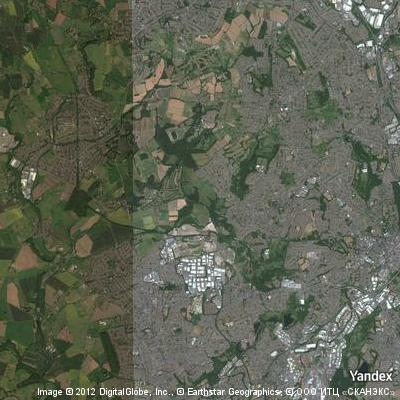

In [46]:
from IPython.display import Image


#ipython to display images:
    
Image(map_png.content)

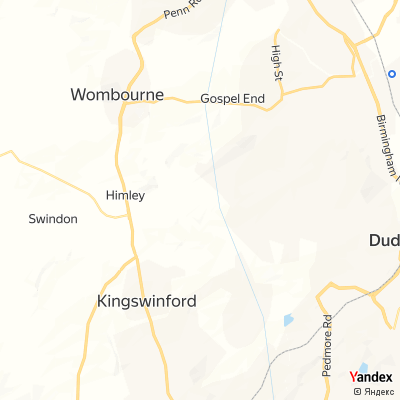

In [47]:
map_png = request_map_at(pos[1], pos[0], satellite=False)

Image(map_png.content)